# 1.0 Importação de bibliotecas

In [1]:
#Manipulação de dados
import pandas as pd
import numpy as np

#Visualização de dados
import seaborn as sns

#Manipulação datas
from datetime import datetime

# Prototipação
import sklearn
#from sklearn.utils.testing import ignore_warnings
#from lazypredict.Supervised import LazyClassifier


#Pipeline e pré-process

from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#Models
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import RandomForestClassifier

#Model Tunning
from sklearn.model_selection import GridSearchCV

#Model evaluation
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#pip install scikit-learn==0.23.1

In [3]:
#import sklearn
#print(sklearn.__version__)

# 2.0 Leitura dos arquivos

## Leitura de Noticias

In [4]:
dicionario_mes = {'Jan':'01', 'Fev':'02', 'Mar':'03','Abr':'04', 'Mai':'05', 'Jun':'06','Jul':'07', 'Ago':'08', 'Set':'09','Out':'10', 'Nov':'11', 'Dec':'12'}

In [5]:
df = pd.DataFrame()

for i in dicionario_mes.keys():
    arquivo = dicionario_mes[i] + "_GoogleNews_Petr_" + i + "_21.csv"
    df_leitura = pd.read_csv(arquivo, sep='|')
    df = df.append(df_leitura,ignore_index=True)

C:\Users\lenon.oliveira\AppData\Local\Temp\ipykernel_19120\1548341161.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_leitura,ignore_index=True)
C:\Users\lenon.oliveira\AppData\Local\Temp\ipykernel_19120\1548341161.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_leitura,ignore_index=True)
C:\Users\lenon.oliveira\AppData\Local\Temp\ipykernel_19120\1548341161.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_leitura,ignore_index=True)
C:\Users\lenon.oliveira\AppData\Local\Temp\ipykernel_19120\1548341161.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_lei

In [6]:
df.head()

,title,media,date,desc
0,A construção naval brasileira tem chances de a...,CPG Click Petroleo e Gas,01/01/2021,Dentre os principais pontos do plano estratégi...
1,"Refinaria Abreu e Lima da Petrobras, a RNEST p...",CPG Click Petroleo e Gas,01/01/2021,Petrobras informou em fato relevante na última...
2,5 Dicas de Tony Robbins para Ficar Rico Invest...,The Capital Advisor,01/01/2021,O QUE LER AGORA... ibovespa-sobe-021-apos-demi...
3,Acadêmicos de engenharia Mecânica criam projet...,CPG Click Petroleo e Gas,01/01/2021,Petrobras cancela a venda da fábrica de fertil...
4,Multinacional dinamarquesa European Energy faz...,CPG Click Petroleo e Gas,01/01/2021,Petrobras encerra sociedade com a Sete Brasil ...


In [7]:
#Transformando coluna data para datetime:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

C:\Users\lenon.oliveira\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\lenon.oliveira\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\lenon.oliveira\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\lenon.oliveira\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/01/2021' in DD/MM/Y

title            object
media            object
date     datetime64[ns]
desc             object
dtype: object

## Leitura dos pregões

In [8]:
df_petro = pd.read_csv('Hist_Preço_Petr_2021_.csv', sep='|')
df_petro.head()

,Date,Adj Close,Volume,Var%
0,2021-01-04,19.274340,74719700,0.020113
1,2021-01-05,20.027718,95181100,0.039087
2,2021-01-06,20.067719,96562500,0.001997
3,2021-01-07,20.667747,56171300,0.029900
4,2021-01-08,20.747751,67136300,0.003871


In [9]:
#Transformando a coluna Date para datetime
df_petro['Date'] = pd.to_datetime(df_petro['Date'])
df_petro.dtypes

Date         datetime64[ns]
Adj Close           float64
Volume                int64
Var%                float64
dtype: object

# 3.0 EDA
**H1:** Há uma média razoável de noticias diárias   - **VERDADEIRO**  
**H2:** Há poucos dias sem noticias na base de dados  - **VERDADEIRO**   
**H3:** Há dias em que o pregão da bolsa não funciona (Finais de Semana) **VERDADEIRO**  
**H4:**  
**H5:**  

## 3.1 H1: Há uma média razoável de noticias diárias

In [10]:
df.date.value_counts()

2021-01-01    10
2021-06-08    10
2021-08-27    10
2021-08-26    10
2021-08-25    10
              ..
2021-08-15     2
2021-03-22     2
2021-04-04     2
2021-02-14     2
2021-07-25     1
Name: date, Length: 327, dtype: int64

In [11]:
# Coletando as datas e as frequencias de noticias:
datas = df.date.value_counts()  
data_df = datas.reset_index()
data_df

,index,date
0,2021-01-01,10
1,2021-06-08,10
2,2021-08-27,10
3,2021-08-26,10
4,2021-08-25,10
...,...,...
322,2021-08-15,2
323,2021-03-22,2
324,2021-04-04,2
325,2021-02-14,2


In [12]:
#Visualizando os tipos dos dados
data_df.dtypes

index    datetime64[ns]
date              int64
dtype: object

In [13]:
#Alterando para o formato datetime
data_df['index'] = pd.to_datetime(data_df['index'])
data_df

,index,date
0,2021-01-01,10
1,2021-06-08,10
2,2021-08-27,10
3,2021-08-26,10
4,2021-08-25,10
...,...,...
322,2021-08-15,2
323,2021-03-22,2
324,2021-04-04,2
325,2021-02-14,2


In [14]:
# Organizando o dataframe em ordem cronologica
data_df.sort_values(by = 'index', ascending = True, inplace = True) 
data_df.tail()

,index,date
98,2021-12-27,10
97,2021-12-28,10
96,2021-12-29,10
95,2021-12-30,10
216,2021-12-31,10


In [15]:
data_df.describe()

,date
count,327.000000
mean,9.253823
std,1.772258
min,1.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,10.000000


Há uma média de 9.25 (+- 2) noticias por dia

<AxesSubplot:xlabel='Datas', ylabel='Num_Noticias'>

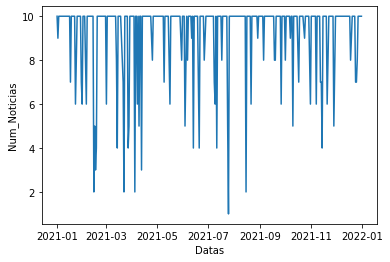

In [16]:
#Visualizando data vs quantidade de notícias
data_df.columns = ['Datas', 'Num_Noticias']
sns.lineplot(x = 'Datas', y = 'Num_Noticias', data = data_df)

In [17]:
# inserindo coluna de mês
data_df['Mes'] = data_df['Datas'].dt.month

# Calculando media de noticias por mês
df_noticia_mes = data_df.groupby('Mes').agg({'Num_Noticias':np.mean})
df_noticia_mes

,Num_Noticias
Mes,
1,9.444444
2,8.888889
3,8.666667
4,9.000000
5,9.642857
6,9.185185
7,8.884615
8,9.535714
9,9.642857


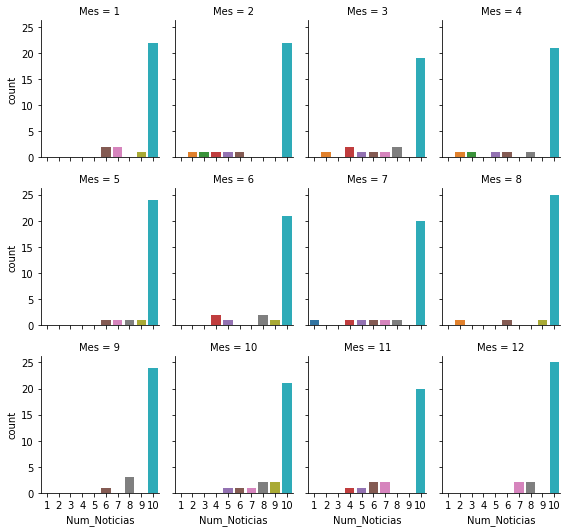

In [18]:
# Visualizando distribuição da quantidade de noticias ao longo dos meses
sns.catplot(x="Num_Noticias", col="Mes", col_wrap=4,
                data=data_df,
                kind="count", height=2.5, aspect=.8)

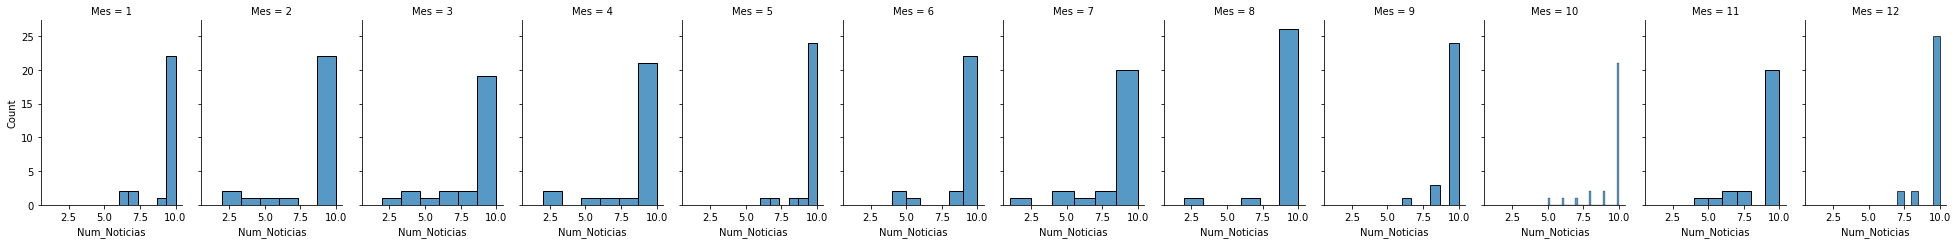

In [19]:
# Visualizando distribuição da quantidade de noticias ao longo dos meses
g = sns.FacetGrid(data_df, col="Mes", height=3.5, aspect=.65)
g.map(sns.histplot, "Num_Noticias")

Há poucas ocorrências de baixo numero de noticias por dia, a maior ocorrência da quantidade de noticias por dia é de 10.
Dessa forma, a média de noticias por mês varia de 8.6 á 9.65.

## 3.2 Há poucos dias sem noticias na base de dados

In [20]:
## Gerando uma lista com todos os dias de 2021:
start_date = '01/01/2021'
end_date = '31/12/2021'

#Transformando para o padrão inglês
start_date = datetime.strptime(start_date, '%d/%m/%Y').strftime('%m-%d-%Y')
end_date = datetime.strptime(end_date, '%d/%m/%Y').strftime('%m-%d-%Y')

#Gerando a lista com todas as datas
todas_datas = pd.date_range(start=start_date, end=end_date, freq = '1D')
todas_datas = [i.strftime("%d/%m/%Y") for i in todas_datas ]

In [21]:
#Gerando lista com todas as datas com noticias
datas_com_noticias = [i.strftime("%d/%m/%Y") for i in data_df['Datas'] ]

In [22]:
#Gerando lista com todas as datas sem noticias em 2021
datas_sem_noticias = [i for i in todas_datas if i not in datas_com_noticias]
print("Há %s dias sem notícias em 2021!" % len(datas_sem_noticias))

Há 38 dias sem notícias em 2021!


Em apenas 38 dias de 2021 não houve retorno de noticias diárias da Petrobras

## 3.3 Há dias em que o pregão da bolsa não funciona (Finais de Semana)

In [23]:
datas_com_pregao = [i.strftime("%d/%m/%Y") for i in df_petro['Date'] ]

In [24]:
datas_sem_pregao = [i for i in todas_datas if i not in datas_com_pregao]

In [25]:
print("Há %s dias sem pregão em 2021!" % len(datas_sem_pregao))

Há 118 dias sem pregão em 2021!


# 4.0 Pré-Processamento

## 4.1 Padronização das palavras contidas nos títulos das noticias para minúsculo

In [26]:
df.head()

,title,media,date,desc
0,A construção naval brasileira tem chances de a...,CPG Click Petroleo e Gas,2021-01-01,Dentre os principais pontos do plano estratégi...
1,"Refinaria Abreu e Lima da Petrobras, a RNEST p...",CPG Click Petroleo e Gas,2021-01-01,Petrobras informou em fato relevante na última...
2,5 Dicas de Tony Robbins para Ficar Rico Invest...,The Capital Advisor,2021-01-01,O QUE LER AGORA... ibovespa-sobe-021-apos-demi...
3,Acadêmicos de engenharia Mecânica criam projet...,CPG Click Petroleo e Gas,2021-01-01,Petrobras cancela a venda da fábrica de fertil...
4,Multinacional dinamarquesa European Energy faz...,CPG Click Petroleo e Gas,2021-01-01,Petrobras encerra sociedade com a Sete Brasil ...


In [27]:
df['title'] = df['title'].apply(lambda x: x.lower())
df.head()

,title,media,date,desc
0,a construção naval brasileira tem chances de a...,CPG Click Petroleo e Gas,2021-01-01,Dentre os principais pontos do plano estratégi...
1,"refinaria abreu e lima da petrobras, a rnest p...",CPG Click Petroleo e Gas,2021-01-01,Petrobras informou em fato relevante na última...
2,5 dicas de tony robbins para ficar rico invest...,The Capital Advisor,2021-01-01,O QUE LER AGORA... ibovespa-sobe-021-apos-demi...
3,acadêmicos de engenharia mecânica criam projet...,CPG Click Petroleo e Gas,2021-01-01,Petrobras cancela a venda da fábrica de fertil...
4,multinacional dinamarquesa european energy faz...,CPG Click Petroleo e Gas,2021-01-01,Petrobras encerra sociedade com a Sete Brasil ...


## 4.2 Exclusão noticias que não contenham a palavra chave "Petrobras" no título
Embora tenha-se configurado A biblioteca GoogleNews() para baixar noticias pela palavra chave "Petrobras" pode ocorrer casos em que o termo não é citado no título e nem no corpo da noticia.

In [28]:
df.iloc[2][0]

'5 dicas de tony robbins para ficar rico investindo'

In [29]:
df.iloc[2][3]

'O QUE LER AGORA... ibovespa-sobe-021-apos-demissao-na-petrobras-prio3-.  Notícias. Ibovespa Sobe +0...'

Essa noticia "5 dicas de tony robbins para ficar rico investindo", por exemplo, não possui relação com a petrobras no título e nem no corpo do artigo ao checar direto na fonte em <https://comoinvestir.thecap.com.br/5-dicas-de-tony-robbins-para-ficar-rico-investindo>. A biblioteca GoogleNews() retornou essa noticia, pois, na pagina HTML há noticias recomendadas ao leitor que possuem a palavra chave "petrobras".

Noticias sem a palavra chave "petrobras" no título serão excluidas do dataset

In [30]:
df['title'] = df['title'].apply(lambda x: "" if "petrobras" not in x else x)
df

,title,media,date,desc
0,a construção naval brasileira tem chances de a...,CPG Click Petroleo e Gas,2021-01-01,Dentre os principais pontos do plano estratégi...
1,"refinaria abreu e lima da petrobras, a rnest p...",CPG Click Petroleo e Gas,2021-01-01,Petrobras informou em fato relevante na última...
2,,The Capital Advisor,2021-01-01,O QUE LER AGORA... ibovespa-sobe-021-apos-demi...
3,,CPG Click Petroleo e Gas,2021-01-01,Petrobras cancela a venda da fábrica de fertil...
4,,CPG Click Petroleo e Gas,2021-01-01,Petrobras encerra sociedade com a Sete Brasil ...
...,...,...,...,...
3021,quer trabalhar na petrobras? falta menos de um...,JC Online,2021-12-31,O processo seletivo público que oferece 757 va...
3022,,CNN Brasil,2021-12-31,"Para ele, a solução desta pressão não deve pas..."
3023,,PetroNotícias,2021-12-31,Isso porque a Petrobrás anunciou que registrou...
3024,unigel assina contratos para suprimento das fá...,CPG Click Petroleo e Gas,2021-12-31,No dia 27 de dezembro a Unigel fechou contrato...


In [31]:
df = df[(df['title'] != "")]
df

,title,media,date,desc
0,a construção naval brasileira tem chances de a...,CPG Click Petroleo e Gas,2021-01-01,Dentre os principais pontos do plano estratégi...
1,"refinaria abreu e lima da petrobras, a rnest p...",CPG Click Petroleo e Gas,2021-01-01,Petrobras informou em fato relevante na última...
26,petrobras é condenada em arbitragem iniciada p...,Forbes Brasil,2021-04-01,A Petrobras disse que a sentença determinou qu...
27,petrobras fez provisionamento para indenizar iesa,Valor Econômico,2021-04-01,Petrobras fez provisionamento para indenizar I...
28,"petrobras é condenada, nos eua, a indenizar a ...",Money Times,2021-04-01,A Petrobras (PETR3; PETR4) foi condenada por u...
...,...,...,...,...
3018,aumento do preço do gás encanado: justiça inti...,FDR,2021-12-31,"Na última quinta-feira, 30, a Petrobras recebe..."
3019,presidente da petrobras diz que eleições não v...,Jovem Pan,2021-12-31,"Para 2022, Joaquim Silva e Luna entende que a ..."
3020,"petrobras conclui venda de ativos do rn, em me...",Saiba Mais,2021-12-31,Após os trabalhadores aprovarem estado de grev...
3021,quer trabalhar na petrobras? falta menos de um...,JC Online,2021-12-31,O processo seletivo público que oferece 757 va...


1494 noticias não relacionadas ao termo "Petrobras" em seus títulos foram foram excluidas do dataset

## 4.4 Adição de classe "Fechamento" ao dataframe de Ações
Classe 1: Fechamento em alta  
Classe 0: Fechamento em queda  

In [32]:
df_petro

,Date,Adj Close,Volume,Var%
0,2021-01-04,19.274340,74719700,0.020113
1,2021-01-05,20.027718,95181100,0.039087
2,2021-01-06,20.067719,96562500,0.001997
3,2021-01-07,20.667747,56171300,0.029900
4,2021-01-08,20.747751,67136300,0.003871
...,...,...,...,...
242,2021-12-23,23.237993,28713600,0.006037
243,2021-12-27,23.582502,44227900,0.014825
244,2021-12-28,23.607111,30688100,0.001044
245,2021-12-29,23.410248,35508400,-0.008339


In [33]:
df_petro['Fechamento'] = df_petro['Var%'].apply(lambda x: 0 if x<0 else 1)
df_petro

,Date,Adj Close,Volume,Var%,Fechamento
0,2021-01-04,19.274340,74719700,0.020113,1
1,2021-01-05,20.027718,95181100,0.039087,1
2,2021-01-06,20.067719,96562500,0.001997,1
3,2021-01-07,20.667747,56171300,0.029900,1
4,2021-01-08,20.747751,67136300,0.003871,1
...,...,...,...,...,...
242,2021-12-23,23.237993,28713600,0.006037,1
243,2021-12-27,23.582502,44227900,0.014825,1
244,2021-12-28,23.607111,30688100,0.001044,1
245,2021-12-29,23.410248,35508400,-0.008339,0


In [34]:
df_petro.Fechamento.value_counts()

1    131
0    116
Name: Fechamento, dtype: int64

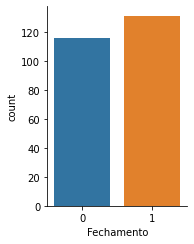

In [35]:
sns.catplot(x="Fechamento",
                data=df_petro,
                kind="count", height=3.5, aspect=.8)

Em 2021 houve 131 fechamentos com aumento nos valores de ações da Petrobras e 116 com fechamento em queda.

## 4.5 Concatenar noticias diárias

In [36]:
df_petro.head()

,Date,Adj Close,Volume,Var%,Fechamento
0,2021-01-04,19.274340,74719700,0.020113,1
1,2021-01-05,20.027718,95181100,0.039087,1
2,2021-01-06,20.067719,96562500,0.001997,1
3,2021-01-07,20.667747,56171300,0.029900,1
4,2021-01-08,20.747751,67136300,0.003871,1


In [37]:
df.head()

,title,media,date,desc
0,a construção naval brasileira tem chances de a...,CPG Click Petroleo e Gas,2021-01-01,Dentre os principais pontos do plano estratégi...
1,"refinaria abreu e lima da petrobras, a rnest p...",CPG Click Petroleo e Gas,2021-01-01,Petrobras informou em fato relevante na última...
26,petrobras é condenada em arbitragem iniciada p...,Forbes Brasil,2021-04-01,A Petrobras disse que a sentença determinou qu...
27,petrobras fez provisionamento para indenizar iesa,Valor Econômico,2021-04-01,Petrobras fez provisionamento para indenizar I...
28,"petrobras é condenada, nos eua, a indenizar a ...",Money Times,2021-04-01,A Petrobras (PETR3; PETR4) foi condenada por u...


In [38]:
lista_datas = []
lista_news = []

for i in df.date.unique():
    news = ""
    for row in df[(df['date']==i)].iterrows():
        news = news + " " + row[1][0]
    lista_news.append(news)
    lista_datas.append(i)

In [39]:
pd.set_option('display.max_rows', 50)

In [40]:
df_news_diaria = pd.DataFrame(list(zip(lista_datas,lista_news)),
               columns =['Date', 'Noticias'])
df_news_diaria.sort_values(by = 'Date', ascending = True, inplace = True)
df_news_diaria

,Date,Noticias
0,2021-01-01,a construção naval brasileira tem chances de ...
41,2021-01-03,petrobras reajusta preço da gasolina pela qui...
67,2021-01-04,tcu avalia barrar venda de refinaria da petro...
87,2021-01-05,petrobras (petr4) inicia contratação de nona ...
113,2021-01-06,valor de venda de refinaria da petrobras é qu...
...,...,...
294,2021-12-27,alerj vai à justiça contra a petrobras para b...
295,2021-12-28,distribuidoras de gás de 5 estados entram na ...
296,2021-12-29,petrobras vai recorrer de decisão que suspend...
297,2021-12-30,judicialização coloca mercado de gás em risco...


# 2 situações checar: 


1) Dias em que há pregão mas não há noticias, sendo que o dia anterior não tem pregão e tem noticias.  
2) Dias que há pregão e há noticias, sendo que no dia anterior não há pregão e há noticias.  

**Exemplo 1:** dia 29/11/2021 houve pregão mas não há noticias naquele dia, somente nos dias anteriores que nao houveram pregão e tiveram noticias 27/11/2021 e 28/11/2021.  
**Exemplo 2:** dia 18/01/2021 houve pregão e há noticias naquele dia, após concatenar as noticias do dia 18/01/2021 deverá incluir as noticias dos dias 16 e 17/01/2021 que não houve pregão;


In [41]:
## Itera sobre dias com pregao
for i in datas_com_pregao:
    
    ## Se o dia não tiver noticias retorna a data do dia anterior
    if i in datas_sem_noticias:
        dia_anterior = str(int(i[:2])-1) + i[2:10]
        
        # #Se o dia anterior não tiver pregão
        if dia_anterior in datas_sem_pregao:
                
            ## Se o dia anterior tiver noticias:
            if dia_anterior in datas_com_noticias:
                print(i)

29/11/2021


In [42]:
## 27/11/2021
noticia_dia_27 = df_news_diaria.iloc[267][1]
noticia_dia_27

' bolsonaro critica política de preços dos combustíveis da petrobras ibovespa: petrobras (petr4) e vale (vale3) têm maiores altas para itaú bba, pagamento de dividendos da petrobras (petr4) pode ser ainda maior usina termelétrica de camaçari: um dos principais investimentos da petrobras na bahia, foi arrendado ontem (26/11) para a petroquímica proquigel empreiteira de perfuração offshore seadrill conquista contratos de us$ 549 milhões com a petrobras, no campo de búzios'

In [43]:
## 28/11/2021
noticia_dia_28 = df_news_diaria.iloc[268][1]
noticia_dia_28

' por que a privatização da petrobras não é garantia de ... petrobras e mubadala assinam transferência final da rlam nos próximos dias petrobras deve começar a vender fatia na braskem no primeiro trimestre'

In [44]:
## 29/11/2021 -- NÂO EXISTE NOTICIA
noticia_dia_29 = ""

In [45]:
## 16/01/2021
noticia_dia_16 = df_news_diaria.iloc[11][1]
noticia_dia_16

' mais de 100 vagas de emprego no setor de petróleo e gás! ocyan inicia cadastro de currículo para contratos de manutenção da petrobras'

In [46]:
## 17/01/2021
noticia_dia_17 = df_news_diaria.iloc[12][1]
noticia_dia_17

' petrobras quer mudar gestão de plano de saúde'

In [47]:
## 18/01/2021
noticia_dia_18 = df_news_diaria.iloc[13][1]
noticia_dia_18

' a petrobras está represando preços de combustíveis? dados indicam que sim, mas analistas não veem motivo para pânico (ainda) petrobras anuncia aumento de mais de 8% na gasolina a partir desta terça-feira litro da gasolina sobe r$ 0,15 nas refinarias da petrobras petrobras avança na venda do maior campo de petróleo em ... ação da petrobras fecha em queda de 0,18% nesta segunda; veja valores petrobras (petr4) aprova abertura de novo plano de ... petrobras recebe em 15 dias propostas para construção de 2 plataformas no rio'

## 4.6 Concatenar noticias referentes a datas sem pregões.

- O próximo dia útil após o periodo sem pregões deverá consolidar as noticias acumuladas dos dias sem pregões.
- O dataset final deverá conter apenas as datas em que ocorreu o pregão

Dessa forma, iniciaremos o procedimento, concatenando as noticias de dias que não houveram pregões

In [48]:
## Iterar sobre as datas dos pregões (iniciando pelo segundo dia do pregão de 2021 df_petro.Date.iloc[1:])

## Calcular delta (diferença entre dias entre dois registros seguidos de pregões):
import datetime

df_news_sem_pregao = pd.DataFrame()
timedelta_1dia = datetime.timedelta(days=1)

lista_datas = []
lista_noticias_sem_pregao = []

for i, data in enumerate(df_petro.Date.iloc[1:]):
    data_anterior = df_petro['Date'].iloc[i]  
    delta = data - data_anterior

    
    # Se houver mais de 1 dia sem pregão:    
    if delta > timedelta_1dia:
            
            
        # Filtra as noticias entre as datas sem pregão:
        df_aux = df_news_diaria[ (df_news_diaria['Date']> data_anterior) & (df_news_diaria['Date']<= data)  ]
        
        ## Concatena as noticias das datas sem pregão
        news = ""
        for row in df_aux.iterrows():
            news = news + " " + row[1][1]


        ## Armazena as noticias e data do ultimo pregão valido em listas
        lista_noticias_sem_pregao.append(news)
        lista_datas.append(data)
        
        #Cria um dataframe auxiliar com a data do ultimo pregão e as noticias concatenadas dos dias sem pregões:
        df_aux2 = pd.DataFrame(list(zip(lista_datas,lista_noticias_sem_pregao)),
               columns =['Date', 'Noticias'])
    
        # Gera o dataframe com as noticias sem pregões + datas do ultimo pregão valido.
        df_news_sem_pregao = df_news_sem_pregao.append(df_aux2, ignore_index = True)
        
        #Resetando as listas para geração de novo DF
        lista_noticias_sem_pregao = []
        lista_datas = []
        
df_news_sem_pregao

C:\Users\lenon.oliveira\AppData\Local\Temp\ipykernel_19120\2324495316.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_news_sem_pregao = df_news_sem_pregao.append(df_aux2, ignore_index = True)
C:\Users\lenon.oliveira\AppData\Local\Temp\ipykernel_19120\2324495316.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_news_sem_pregao = df_news_sem_pregao.append(df_aux2, ignore_index = True)
C:\Users\lenon.oliveira\AppData\Local\Temp\ipykernel_19120\2324495316.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_news_sem_pregao = df_news_sem_pregao.append(df_aux2, ignore_index = True)
C:\Users\lenon.oliveira\AppData\Local\Temp\ipykernel_19120\2324495316.py:39: FutureWarning: The frame.append method is deprecated and

C:\Users\lenon.oliveira\AppData\Local\Temp\ipykernel_19120\2324495316.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_news_sem_pregao = df_news_sem_pregao.append(df_aux2, ignore_index = True)
C:\Users\lenon.oliveira\AppData\Local\Temp\ipykernel_19120\2324495316.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_news_sem_pregao = df_news_sem_pregao.append(df_aux2, ignore_index = True)
C:\Users\lenon.oliveira\AppData\Local\Temp\ipykernel_19120\2324495316.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_news_sem_pregao = df_news_sem_pregao.append(df_aux2, ignore_index = True)
C:\Users\lenon.oliveira\AppData\Local\Temp\ipykernel_19120\2324495316.py:39: FutureWarning: The frame.append method is deprecated and

,Date,Noticias
0,2021-01-11,silva e luna 'militariza' cúpula da petrobra...
1,2021-01-18,mais de 100 vagas de emprego no setor de pet...
2,2021-01-26,petrobras encerra 2020 com quadro de funcion...
3,2021-02-01,
4,2021-02-08,petrobras mira emissão no mercado internacio...
...,...,...
51,2021-11-29,bolsonaro critica política de preços dos com...
52,2021-12-06,petrobras aumenta exportação de óleo pelo po...
53,2021-12-13,petrobras fecha venda da six por 33 milhões ...
54,2021-12-20,petrobras abre o 1º concurso em 3 anos com s...


Obs: Note que nos dias 04/06/2021 e 01/02/2021 houveram pregão mas não houveram noticias referente a esses dias nem os dias que os precederam.
    
    # Situação OK!

# Checagem situação de 29/11/2021

In [49]:
noticias_concatenadas = " " + noticia_dia_27 + " " + noticia_dia_28 + " " + noticia_dia_29
noticias_concatenadas

'  bolsonaro critica política de preços dos combustíveis da petrobras ibovespa: petrobras (petr4) e vale (vale3) têm maiores altas para itaú bba, pagamento de dividendos da petrobras (petr4) pode ser ainda maior usina termelétrica de camaçari: um dos principais investimentos da petrobras na bahia, foi arrendado ontem (26/11) para a petroquímica proquigel empreiteira de perfuração offshore seadrill conquista contratos de us$ 549 milhões com a petrobras, no campo de búzios  por que a privatização da petrobras não é garantia de ... petrobras e mubadala assinam transferência final da rlam nos próximos dias petrobras deve começar a vender fatia na braskem no primeiro trimestre '

In [50]:
df_news_sem_pregao.iloc[51][1] + " "


'  bolsonaro critica política de preços dos combustíveis da petrobras ibovespa: petrobras (petr4) e vale (vale3) têm maiores altas para itaú bba, pagamento de dividendos da petrobras (petr4) pode ser ainda maior usina termelétrica de camaçari: um dos principais investimentos da petrobras na bahia, foi arrendado ontem (26/11) para a petroquímica proquigel empreiteira de perfuração offshore seadrill conquista contratos de us$ 549 milhões com a petrobras, no campo de búzios  por que a privatização da petrobras não é garantia de ... petrobras e mubadala assinam transferência final da rlam nos próximos dias petrobras deve começar a vender fatia na braskem no primeiro trimestre '

Codigo OK as noticias são iguais! 

# Checagem situação de 18/01/2021

In [51]:
noticias_concatenadas = " " + noticia_dia_16 + " " + noticia_dia_17 + " " + noticia_dia_18
noticias_concatenadas

'  mais de 100 vagas de emprego no setor de petróleo e gás! ocyan inicia cadastro de currículo para contratos de manutenção da petrobras  petrobras quer mudar gestão de plano de saúde  a petrobras está represando preços de combustíveis? dados indicam que sim, mas analistas não veem motivo para pânico (ainda) petrobras anuncia aumento de mais de 8% na gasolina a partir desta terça-feira litro da gasolina sobe r$ 0,15 nas refinarias da petrobras petrobras avança na venda do maior campo de petróleo em ... ação da petrobras fecha em queda de 0,18% nesta segunda; veja valores petrobras (petr4) aprova abertura de novo plano de ... petrobras recebe em 15 dias propostas para construção de 2 plataformas no rio'

In [52]:
df_news_sem_pregao.iloc[1][1] 

'  mais de 100 vagas de emprego no setor de petróleo e gás! ocyan inicia cadastro de currículo para contratos de manutenção da petrobras  petrobras quer mudar gestão de plano de saúde  a petrobras está represando preços de combustíveis? dados indicam que sim, mas analistas não veem motivo para pânico (ainda) petrobras anuncia aumento de mais de 8% na gasolina a partir desta terça-feira litro da gasolina sobe r$ 0,15 nas refinarias da petrobras petrobras avança na venda do maior campo de petróleo em ... ação da petrobras fecha em queda de 0,18% nesta segunda; veja valores petrobras (petr4) aprova abertura de novo plano de ... petrobras recebe em 15 dias propostas para construção de 2 plataformas no rio'

Codigo OK as noticias são iguais! 

## 4.7 Atualiza as noticias concatenadas no df_news_diaria:

In [53]:
df_news_diaria_atualizada = df_news_diaria.copy()

# itera sobre os dias com pregão cujo noticias de dias anteriores foram concatenadas:
for data in df_news_sem_pregao.Date.unique():
    
    #Filtra pelo dia com pregão que teve noticias concatenada
    df_noticia_dias_sem_pregao = df_news_sem_pregao[(df_news_sem_pregao['Date']==data)]


    #Checa se há registro referente a data no df de noticias
    df_check_noticias = df_news_diaria_atualizada[(df_news_diaria_atualizada['Date']==data)]
    
    # Se não houver registros referente á data então o registro deverá ser criado no df de noticias:
    # Se houver, então o registro será atualizado no df de noticias
    
    if len(df_check_noticias) > 0:
        
        #Substitui os registros
        df_news_diaria_atualizada = df_news_diaria_atualizada.replace ((df_news_diaria_atualizada.loc[df_news_diaria_atualizada['Date'].isin(df_noticia_dias_sem_pregao['Date'])])['Noticias'].values, df_noticia_dias_sem_pregao['Noticias'].values)
        
    else:
        #Insere o novo registro
        df_news_diaria_atualizada = df_news_diaria_atualizada.append(df_noticia_dias_sem_pregao, ignore_index = True)

C:\Users\lenon.oliveira\AppData\Local\Temp\ipykernel_19120\865046954.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_news_diaria_atualizada = df_news_diaria_atualizada.append(df_noticia_dias_sem_pregao, ignore_index = True)


In [54]:
len(df_news_diaria), len(df_news_diaria_atualizada)

(299, 306)

## 4.8 Mesclando o dataframe noticias finais e ações

In [55]:
df_final = pd.merge(left = df_petro, right = df_news_diaria_atualizada, how = 'left', on = 'Date')
df_final.head(10)

,Date,Adj Close,Volume,Var%,Fechamento,Noticias
0,2021-01-04,19.274340,74719700,0.020113,1,tcu avalia barrar venda de refinaria da petro...
1,2021-01-05,20.027718,95181100,0.039087,1,petrobras (petr4) inicia contratação de nona ...
2,2021-01-06,20.067719,96562500,0.001997,1,valor de venda de refinaria da petrobras é qu...
3,2021-01-07,20.667747,56171300,0.029900,1,petrobras confirma venda da fatia na br distr...
4,2021-01-08,20.747751,67136300,0.003871,1,NaN
5,2021-01-11,20.574409,48744700,-0.008355,0,silva e luna 'militariza' cúpula da petrobra...
6,2021-01-12,20.421068,65691900,-0.007453,0,árabes assumem nesta quarta primeira refinari...
7,2021-01-13,19.434349,93826600,-0.048319,0,petrobras é a segunda maior do mundo em opera...
8,2021-01-14,19.634359,50745400,0.010292,1,NaN
9,2021-01-15,18.747646,80673300,-0.045161,0,NaN


In [56]:
df_news_diaria_atualizada.head(12)

,Date,Noticias
0,2021-01-01,a construção naval brasileira tem chances de ...
1,2021-01-03,petrobras reajusta preço da gasolina pela qui...
2,2021-01-04,tcu avalia barrar venda de refinaria da petro...
3,2021-01-05,petrobras (petr4) inicia contratação de nona ...
4,2021-01-06,valor de venda de refinaria da petrobras é qu...
5,2021-01-07,petrobras confirma venda da fatia na br distr...
6,2021-01-09,silva e luna 'militariza' cúpula da petrobras...
7,2021-01-10,bolsonaro sugere usar dividendos da petrobras...
8,2021-01-11,silva e luna 'militariza' cúpula da petrobra...
9,2021-01-12,árabes assumem nesta quarta primeira refinari...


In [57]:
df_final[(df_final['Noticias'].isnull())].Date, len(df_final[(df_final['Noticias'].isnull())].Date)

(4     2021-01-08
 8     2021-01-14
 9     2021-01-15
 13    2021-01-21
 16    2021-01-27
 22    2021-02-04
 40    2021-03-04
 41    2021-03-05
 43    2021-03-09
 51    2021-03-19
 63    2021-04-07
 68    2021-04-14
 72    2021-04-20
 83    2021-05-06
 87    2021-05-12
 117   2021-06-24
 122   2021-07-01
 134   2021-07-20
 136   2021-07-22
 140   2021-07-28
 142   2021-07-30
 146   2021-08-05
 147   2021-08-06
 152   2021-08-13
 170   2021-09-09
 171   2021-09-10
 208   2021-11-04
 220   2021-11-23
 Name: Date, dtype: datetime64[ns],
 28)

No total houveram 28 registros de pregões sem atribuição de noticias.

Para esses registros observou-se que:  

**1) Não houveram noticias na respectiva data e/ou**  
**2) Considerando as datas sem pregões que antecederam a data do pregão também não houveram noticias.**  

In [58]:
len(df_final), len(df_final[(df_final['Noticias'].isnull())].Date)

(247, 28)

## 4.9 Exclusão dias com pregões sem noticias

In [59]:
df_final = df_final.dropna()

In [60]:
len(df_final)

219

# 5.0 NLP

Será realizado o levantamento das palavras mais frequentes em notícias para inputação de polaridade no dicionário SentilexPT caso não existam ainda.

# 5.1 SentilexPT: Inputação de polaridade de novos termos ao dicionário SentilexPT

In [61]:
sentilexpt = open('SentiLex-lem-PT01.txt','r')

Criando um dicionário com polaridades

In [62]:
dic_palavra_polaridade = {}
for i in sentilexpt.readlines():
    pos_ponto = i.find('.')            # obtem a posiçãodo caracter ponto
    palavra = (i[:pos_ponto])          # Pega a palavra
    pol_pos = i.find('POL')            # obtem a posição do inicio da string POL
    polaridade = (i[pol_pos+4:pol_pos+6]).replace(';','')         # obtem a polaridade da palavra
    dic_palavra_polaridade[palavra] = polaridade                  # atualiza o dicionario com a palavra a polaridade

In [63]:
print (dic_palavra_polaridade.get('legal'))

1


In [64]:
print (dic_palavra_polaridade.get('chato'))

-1


In [65]:
def Score_sentimento(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    l_sentimento = []                         # cria uma lista vazia
    for p in frase.split():
        l_sentimento.append(int(dic_palavra_polaridade.get(p, 0)))      # para cada palavra obtem a polaridade
    #print (l_sentimento)                                                # imprime a lista de polaridades
    score = sum(l_sentimento)                                           # soma todos os valores da lista
    #if score > 0:
        #return 'Positivo, Score:{}'.format(score)                       # se maior que 0 retorna 'positivo'
    #elif score == 0:
        #return 'Neutro, Score:{}'.format(score)                         # se igual a 0 retorna 'neutro'
    #else:
        #return 'Negativo, Score:{}'.format(score)                       # se menor que 0 retorna 'negativo'
        
    return score

In [66]:
def sentimento(score):
    if score > 0:
        return 'Positivo'                      # se maior que 0 retorna 'positivo'
    elif score == 0:
        return 'Neutro'                     # se igual a 0 retorna 'neutro'
    else:
        return 'Negativo'                     # se menor que 0 retorna 'negativo'
        
    return score

In [67]:
testescore = Score_sentimento("DescaRadO e feIo")
testescore

-2

In [68]:
sentimento(testescore)

'Negativo'

In [69]:
df_final2 = df_final.copy()

In [70]:
df_final2['score'] = df_final2['Noticias'].apply(lambda x: Score_sentimento(x))
df_final2['Sentimento'] = df_final2['score'].apply(lambda x: sentimento(x))
df_final2

,Date,Adj Close,Volume,Var%,Fechamento,Noticias,score,Sentimento
0,2021-01-04,19.274340,74719700,0.020113,1,tcu avalia barrar venda de refinaria da petro...,-1,Negativo
1,2021-01-05,20.027718,95181100,0.039087,1,petrobras (petr4) inicia contratação de nona ...,0,Neutro
2,2021-01-06,20.067719,96562500,0.001997,1,valor de venda de refinaria da petrobras é qu...,-1,Negativo
3,2021-01-07,20.667747,56171300,0.029900,1,petrobras confirma venda da fatia na br distr...,0,Neutro
5,2021-01-11,20.574409,48744700,-0.008355,0,silva e luna 'militariza' cúpula da petrobra...,0,Neutro
...,...,...,...,...,...,...,...,...
242,2021-12-23,23.237993,28713600,0.006037,1,programa da petrobras que reforça capital de ...,-1,Negativo
243,2021-12-27,23.582502,44227900,0.014825,1,"petrobras vende carmópolis por us$ 1,1 bilhã...",3,Positivo
244,2021-12-28,23.607111,30688100,0.001044,1,distribuidoras de gás de 5 estados entram na ...,0,Neutro
245,2021-12-29,23.410248,35508400,-0.008339,0,petrobras vai recorrer de decisão que suspend...,3,Positivo


#  1º Alterações Lenon


### Pegando os dias de maiores volumes

In [71]:
df_final21 = df_final2.sort_values(by=['Volume'], ascending=False)
df30 = df_final21.head(30)

In [72]:
df_final21

,Date,Adj Close,Volume,Var%,Fechamento,Noticias,score,Sentimento
32,2021-02-22,14.447424,490230400,-0.207098,0,bolsonaro indica joaquim silva e luna para p...,1,Positivo
33,2021-02-23,16.040838,293503100,0.110291,1,troca de comando na petrobras: veja perguntas...,-1,Negativo
31,2021-02-19,18.220953,215834800,-0.066280,0,bolsonaro critica petrobras após reajuste de ...,0,Neutro
71,2021-04-19,16.732317,196519100,0.057952,1,conselheiro renuncia e tumultua sucessão na ...,0,Neutro
89,2021-05-14,18.124380,196135500,0.052421,1,petrobras diz que busca competitividade com p...,1,Positivo
...,...,...,...,...,...,...,...,...
241,2021-12-22,23.098549,33734500,-0.001418,0,petrobras (petr3; petr4) conclui renovação de...,0,Neutro
75,2021-04-26,16.387749,33281000,0.003799,1,petrobras pagará dividendos em 29 de abril p...,0,Neutro
244,2021-12-28,23.607111,30688100,0.001044,1,distribuidoras de gás de 5 estados entram na ...,0,Neutro
242,2021-12-23,23.237993,28713600,0.006037,1,programa da petrobras que reforça capital de ...,-1,Negativo


### analise dos 30 dias de maior volume 


In [73]:
df30.groupby(['Fechamento']).count()

,Date,Adj Close,Volume,Var%,Noticias,score,Sentimento
Fechamento,,,,,,,
0,17,17,17,17,17,17,17
1,13,13,13,13,13,13,13


In [74]:
df30.groupby(['Sentimento']).count()

,Date,Adj Close,Volume,Var%,Fechamento,Noticias,score
Sentimento,,,,,,,
Negativo,9,9,9,9,9,9,9
Neutro,14,14,14,14,14,14,14
Positivo,7,7,7,7,7,7,7


Entre os 30 dias de maior volume: 
- 56% sao de quedas e 44% sao de alta
- 23% sentimento positivo, 46% neutro e 30% negativo


## Analisando as palavras mais comuns no dataset

In [75]:
a = df_final21['Noticias']
list(a)
b = a.values[0]

In [76]:
!pip install nltk

In [77]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [78]:
frase = b


"  bolsonaro indica joaquim silva e luna para presidência da petrobras bolsonaro anuncia indicação de general joaquim silva e luna para assumir presidência da petrobras bolsonaro anuncia general como novo presidente da petrobras bolsonaro demite presidente da petrobras e indica general da reserva para o cargo brasileiro precisa entender que petrobras não pode ser a única responsável por preço, diz especialista petrobras não tem um presidente militar desde 1988  general luna deve manter atual política de preços da petrobras após intervir na petrobras, bolsonaro diz que gasolina poderia estar 15% mais barata conselho da petrobras é formado em sua maioria por nomes escolhidos pelo governo petrobras (petr4): analistas demonstram preocupação com mudança no comando sucessão na petrobras: saiba quem são os conselheiros que vão avaliar indicação de silva e luna para a presidência da estatal petrobras (petr4) caindo? não posso ignorar o 'tapa na cara ...  ‘não há mais como defender. rebaixamos 

In [79]:
palavras = nltk.word_tokenize(frase)

In [80]:
from nltk import FreqDist
frequencia = FreqDist(frase)

### Criando uma lista com as noticias de todos os dias 

In [83]:
a = df_final2['Noticias']
a = list(a)
len(a)

219

In [86]:
c = ""
for i in a:
    c += i

In [88]:
frase = c
palavras = nltk.word_tokenize(frase)

In [89]:
frequencia = FreqDist(frase)
fdist = FreqDist(palavras)
fdist.most_common(80)

[('petrobras', 1513),
 ('de', 1104),
 ('da', 713),
 ('e', 529),
 (',', 522),
 ('em', 338),
 ('...', 299),
 ('do', 296),
 ('para', 289),
 ('a', 283),
 ('no', 225),
 ('na', 224),
 ('com', 196),
 ('(', 187),
 (')', 185),
 (':', 181),
 ('que', 178),
 ('$', 178),
 ('%', 154),
 ('por', 146),
 ('diz', 135),
 ('o', 127),
 ('r', 123),
 ('venda', 119),
 ('bolsonaro', 112),
 ('petr4', 108),
 ('mais', 107),
 ('gás', 104),
 (';', 103),
 ('gasolina', 96),
 ('preço', 88),
 ('é', 87),
 ('não', 82),
 ('preços', 82),
 ('ações', 79),
 ('petróleo', 70),
 ('após', 68),
 ('combustíveis', 64),
 ('diesel', 62),
 ('refinaria', 58),
 ('sobre', 57),
 ('us', 57),
 ('dos', 54),
 ('vale', 53),
 ('vai', 53),
 ('alta', 51),
 ('política', 51),
 ('dividendos', 51),
 ('à', 51),
 ('pela', 50),
 ('anuncia', 50),
 ("'", 49),
 ('pode', 46),
 ('presidente', 45),
 ('novo', 45),
 ('bi', 44),
 ('ao', 44),
 ('os', 44),
 ('tem', 42),
 ('bilhões', 41),
 ('campos', 40),
 ('se', 39),
 ('até', 39),
 ('?', 38),
 ('milhões', 37),
 ('re

## Remoçao de stopwords, talvez seja melhor remover depois de fazer a traduçao e remover em ingles

In [90]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [92]:
def Removestopwords(instancia):
    instancia = instancia.lower()
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [93]:
caracteres = [",","...", "("," )" ,":", "$",  "%",  ";", "'", "(PETR4)", "PETR4", "petr4","(petr4)" ]

In [94]:
d = Removestopwords(c)

### Remove Caracteres

In [96]:
carac = "!@#$;:,%')(?"
for i in range(0,len(carac)):
     d =d.replace(carac[i],"")

In [149]:
carac2 = "..."
for i in range(0,len(carac2)):
     d =d.replace(carac2[i],"")

In [150]:
frase = d
palavras = nltk.word_tokenize(frase)

In [151]:
frequencia = FreqDist(frase)
fdist = FreqDist(palavras)
fdist.most_common(80)

[('petrobras', 1512),
 ('diz', 135),
 ('venda', 118),
 ('r', 116),
 ('bolsonaro', 112),
 ('gás', 104),
 ('petr4', 103),
 ('gasolina', 96),
 ('preço', 88),
 ('preços', 82),
 ('ações', 79),
 ('petróleo', 70),
 ('após', 68),
 ('combustíveis', 64),
 ('diesel', 64),
 ('refinaria', 58),
 ('sobre', 57),
 ('us', 55),
 ('vale', 53),
 ('vai', 53),
 ('alta', 51),
 ('política', 51),
 ('dividendos', 51),
 ('anuncia', 50),
 ('pode', 46),
 ('presidente', 45),
 ('novo', 45),
 ('bi', 44),
 ('bilhões', 41),
 ('campos', 40),
 ('milhões', 37),
 ('reajuste', 35),
 ('refinarias', 35),
 ('campo', 33),
 ('vende', 33),
 ('aumento', 33),
 ('governo', 33),
 ('brasil', 32),
 ('lucro', 32),
 ('mercado', 31),
 ('sobe', 31),
 ('bacia', 31),
 ('privatização', 30),
 ('contrato', 30),
 ('ação', 29),
 ('bahia', 28),
 ('quer', 28),
 ('maior', 28),
 ('plataforma', 28),
 ('ibovespa', 28),
 ('contra', 27),
 ('rio', 27),
 ('fecha', 27),
 ('natural', 27),
 ('cai', 27),
 ('empresas', 27),
 ('valor', 26),
 ('conclui', 26),
 ('v

# Fim 1º Alteracoes Lenon

# 5.2 Tradução e aplicação textblob e vader sentiment

### Instanciando função de tradução

In [101]:
pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


In [102]:
from googletrans import Translator

In [103]:
trans = Translator()

In [104]:
trans.translate("The book is on the table", dest = 'pt').text

'O livro está sobre a mesa'

In [105]:
def traduzir(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    frase = trans.translate(frase, dest = 'en').text
    return frase

In [106]:
frase_teste = traduzir("A comida está muito boa")
frase_teste

'the food is very good'

### Instanciando calculo de polaridade e subjetividade

In [108]:
#pip install textblob
from textblob import TextBlob

In [109]:
text_blob = TextBlob(frase_teste)
polaridade = text_blob.polarity
subjetividade = text_blob.subjectivity

polaridade, subjetividade

(0.9099999999999999, 0.7800000000000001)

In [110]:
def polaridade(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    text_blob = TextBlob(frase)
    polaridade = text_blob.polarity
    return polaridade

def subjetividade(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    text_blob = TextBlob(frase)
    subjetividade = text_blob.subjectivity
    return subjetividade

### Instanciando calculo de sentimento

In [111]:
#pip install vaderSentiment

In [112]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [113]:
s_analyze = SentimentIntensityAnalyzer()
sentiment= s_analyze.polarity_scores(frase_teste)

In [114]:
sentiment

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}

In [115]:
type(sentiment)
sentiment.get('neu')

0.556

In [116]:
def negatividade(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('neg')
    return sentimento

def neutralidade(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('neu')
    return sentimento

def positividade(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('pos')
    return sentimento

def composicao(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('compound')
    return sentimento

In [140]:
#df_final3 = df_final.copy()
df_final3 = df_final.copy()

In [167]:
len(df_final3)

219

# 2º Alteraçoes Lenon

In [168]:
df_final3.dropna(subset=['Noticias'], inplace=True)

In [187]:
df_final3 = df_final3[df_final3['Noticias']!='']

In [193]:
len(df_final3)

217

In [190]:
df_final3.reset_index(inplace=True)

In [195]:
df_final3.drop(['index'], axis = 1, inplace = True) 

C:\Users\lenon.oliveira\AppData\Local\Temp\ipykernel_19120\3030430285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final3.drop(['index'], axis = 1, inplace = True)


In [202]:
import time

In [203]:
for i in range(0, len(df_final3['Noticias'])):
    if len(df_final3['Noticias'][i])>0:
        df_final3['Noticias'][i] = trans.translate(df_final3['Noticias'][i]).text
        time.sleep(2)
        


C:\Users\lenon.oliveira\AppData\Local\Temp\ipykernel_19120\4265196471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final3['Noticias'][i] = trans.translate(df_final3['Noticias'][i]).text


# Fim 2º Alteraçoes Lenon

In [205]:
df_final3['polaridade'] = df_final3['Noticias'].apply(lambda x: polaridade(x))
df_final3['subjetividade'] = df_final3['Noticias'].apply(lambda x: subjetividade(x))
df_final3['negatividade'] = df_final3['Noticias'].apply(lambda x: negatividade(x))
df_final3['neutralidade'] = df_final3['Noticias'].apply(lambda x: neutralidade(x))
df_final3['positividade'] = df_final3['Noticias'].apply(lambda x: positividade(x))
df_final3['composicao'] = df_final3['Noticias'].apply(lambda x: composicao(x))
df_final3

C:\Users\lenon.oliveira\AppData\Local\Temp\ipykernel_19120\392382725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final3['polaridade'] = df_final3['Noticias'].apply(lambda x: polaridade(x))
C:\Users\lenon.oliveira\AppData\Local\Temp\ipykernel_19120\392382725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final3['subjetividade'] = df_final3['Noticias'].apply(lambda x: subjetividade(x))
C:\Users\lenon.oliveira\AppData\Local\Temp\ipykernel_19120\392382725.py:3: SettingWithCopyWarning: 
A valu

,Date,Adj Close,Volume,Var%,Fechamento,Noticias,polaridade,subjetividade,negatividade,neutralidade,positividade,composicao
0,2021-01-04,19.274340,74719700,0.020113,1,TCU Evaluates Barrar Petrobras Refinery Sale t...,0.000000,0.000000,0.196,0.804,0.000,-0.7783
1,2021-01-05,20.027718,95181100,0.039087,1,Petrbras (Petr4) Starts Hiring Ninth Unit of C...,0.000000,0.000000,0.000,1.000,0.000,0.0000
2,2021-01-06,20.067719,96562500,0.001997,1,Petrobras Refinery Sale Value is questioned in...,0.150000,0.350000,0.020,0.917,0.063,0.4404
3,2021-01-07,20.667747,56171300,0.029900,1,Petrobras confirms the sale of the slice on BR...,0.000000,0.000000,0.051,0.924,0.025,-0.3182
4,2021-01-11,20.574409,48744700,-0.008355,0,Silva and Luna 'militariza' Petrobras Summit P...,0.085000,0.378333,0.041,0.901,0.057,0.1901
...,...,...,...,...,...,...,...,...,...,...,...,...
212,2021-12-23,23.237993,28713600,0.006037,1,Petrobras program that reinforces supplier wor...,0.367273,0.430909,0.000,0.938,0.062,0.5256
213,2021-12-27,23.582502,44227900,0.014825,1,Petrobras sells Carmópolis for $ 1.1 billion P...,0.221818,0.499394,0.098,0.804,0.098,-0.2382
214,2021-12-28,23.607111,30688100,0.001044,1,Gas distributors of 5 states go to court again...,0.466667,0.600000,0.000,0.928,0.072,0.7579
215,2021-12-29,23.410248,35508400,-0.008339,0,Petrobras will appeal a decision that suspends...,0.185714,0.395238,0.016,0.839,0.145,0.9099


# 5.3 Tradução e aplicação do modelo pré-treinado de Roberta
https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial/notebook

In [ ]:
#pip install –upgrade pip

In [ ]:
#pip install tensorflow

In [ ]:
#pip install transformers

In [ ]:
#pip install torch

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
example = "This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [ ]:
def neg_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    neg_roberta = scores[0]
   # neu_roberta = scores[1]
   # pos_roberta = scores[2]
    return neg_roberta

def neu_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    #neg_roberta = scores[0]
    neu_roberta = scores[1]
    #pos_roberta = scores[2]
    return neu_roberta

def pos_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    #neg_roberta = scores[0]
    #neu_roberta = scores[1]
    pos_roberta = scores[2]
    return pos_roberta
    

In [ ]:
df_final4 = df_final.copy()

In [ ]:
#df_final4['Noticias'] = df_final4['Noticias'].apply(lambda x: traduzir(x))

In [ ]:
df_final4['Noticias'] = df_final3['Noticias']
df_final4.head()

In [ ]:
df_final4['neg_rob'] = df_final4['Noticias'].apply(lambda x: neg_rob(x))
df_final4['neu_rob'] = df_final4['Noticias'].apply(lambda x: neu_rob(x))
df_final4['pos_rob'] = df_final4['Noticias'].apply(lambda x: pos_rob(x))
df_final4

# 6.0 Machine Learning: Testes inicias com seleção de features e classificação com algorítmos ingênuos.

## 6.1 SentilexPT

In [ ]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier


In [ ]:
X = df_final2.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias','Sentimento'])
y = df_final2['Fechamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
X_train

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

A acurácia dos top 5 algorítmos variou de 65% á 59%
- DummyClassifier
- QuadraticDiscriminantAnalysis      
- GaussianNB  
- LinearSVC    
- LinearDiscriminantAnalysis

## 6.2 Tradução + Vader Sentiment

In [ ]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

In [ ]:
X = df_final3.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias'])
y = df_final3['Fechamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
X_train

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

A acurácia dos top 5 algorítmos variou de 65% á 64%
- DummyClassifier
- XGBClassifier                           
- LinearSVC                             
- LogisticRegression                     
- RidgeClassifier                    

## 6.3 Modelo pré-treinado de Roberta

In [ ]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

In [ ]:
X = df_final4.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias'])
y = df_final4['Fechamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
X_train

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

A acurácia dos top 5 algorítmos variou de 65% á 52%
- DummyClassifier                    
- Perceptron                                                    
- SGDClassifier                                                   
- BernoulliNB                                             
- NearestCentroid                        

## 6.4 Composição SentilextPT + Tradução & Vader Sentiment

In [ ]:
df_final5 = df_final3.merge(df_final2, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])
df_final5

In [ ]:
X = df_final5.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y','Sentimento'])
y = df_final5['Fechamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
X_train

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

A acurácia dos top 5 algorítmos ficou em 68%
- ExtraTreesClassifier                                         
- LinearSVC                                                 
- RidgeClassifierCV                                      
- LogisticRegression                     
- LinearDiscriminantAnalysis                                 

## 6.5 Composição SentilextPT + Tradução & Roberta

In [ ]:
df_final6 = df_final4.merge(df_final2, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])
df_final6

In [ ]:
X = df_final6.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y','Sentimento'])
y = df_final6['Fechamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
X_train

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

A acurácia dos top 5 algorítmos variou de 65% á 58%

DummyClassifier                    
Perceptron                         
LinearSVC                          
LogisticRegression                 
RidgeClassifier                    

## 6.6 Composição Tradução & Vader Sentiment + Tradução & Roberta


In [ ]:
df_final7 = df_final4.merge(df_final3, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])
df_final7

In [ ]:
X = df_final7.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y'])
y = df_final7['Fechamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
X_train

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

A acurácia dos top 5 algorítmos variou de 65% á 61%

DummyClassifier                    
LinearSVC                                                   
LinearDiscriminantAnalysis  
RidgeClassifier    
LogisticRegression                  

## 6.7 Composição SentilexPT + Tradução & Vader Sentiment + Tradução & Roberta


In [ ]:
# Sentilex + Vader
df_final8 = df_final3.merge(df_final2, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])
df_final8

In [ ]:
# + Roberta
df_final8 = df_final8.merge(df_final4, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])
df_final8

In [ ]:
X = df_final8.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y', 'Noticias', 'Sentimento'])
y = df_final8['Fechamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
X_train

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

A acurácia dos top 5 algorítmos variou de 67% á 64%

CalibratedClassifierCV                                 
LogisticRegression                                                                    
RidgeClassifierCV                    
DummyClassifier                        
LinearSVC                             

## 6.8 Composição SentilexPT + Tradução & Vader Sentiment + Tradução & Roberta com Diminuição de dimensionalidade e Normalização

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df_models = pd.DataFrame()

X = df_final8.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y', 'Noticias', 'Sentimento'])
y = df_final8['Fechamento']
    
## Laço para experimentações com diversos numeros de PCA (de 2 á 9)
for i in range(2,len(X.columns),1):
    print("Testando com PCA = %s!" % i)
    #Holdout
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) ### 
    
    #Aplicando PCA
    pca = PCA(n_components=i)
    x_train = pca.fit_transform(x_train)
    x_test = pca.fit_transform(x_test)

    # normalizando os dados de treino e teste
    scaler_train = StandardScaler()
    scaler_test = StandardScaler()

    scaler_train.fit(x_train)
    scaler_test.fit(x_test)

    x_train_normalized = scaler_train.transform(x_train)
    x_test_normalized = scaler_test.transform(x_test)

    #Testando os modelos
    reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models, predictions = reg.fit(x_train_normalized, x_test_normalized, y_train, y_test)
    models['n_PCA'] = i

    # Armazenando os 5 melhores modelos (Maiores Acurácia)
    df_models = df_models.append(models.reset_index().sort_values(by='Accuracy', ascending=False).head(5), ignore_index=True)

In [ ]:
df_models.sort_values(by='Accuracy', ascending=False)

A acurácia dos top 5 algorítmos ficou em 59%

SGDClassifier com 2 features reduzidas  
SGDClassifier com 5 features reduzidas
CalibratedClassifierCV com 9 features reduzidas  
SGDClassifier com 9 features reduzidas  
CalibratedClassifierCV com 8 features reduzidas

## 6.9 Composição SentilexPT + Tradução & Vader Sentiment + Tradução & Roberta com Diminuição de dimensionalidade e SEM Normalização

In [ ]:
df_models = pd.DataFrame()

X = df_final8.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y', 'Noticias', 'Sentimento'])
y = df_final8['Fechamento']
    
## Laço para experimentações com diversos numeros de PCA (de 2 á 9)
for i in range(2,len(X.columns),1):
    print("Testando com PCA = %s!" % i)
    #Holdout
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) ### 
    
    #Aplicando PCA
    pca = PCA(n_components=i)
    x_train = pca.fit_transform(x_train)
    x_test = pca.fit_transform(x_test)

    #Testando os modelos
    reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models, predictions = reg.fit(x_train, x_test, y_train, y_test)
    models['n_PCA'] = i

    # Armazenando os 5 melhores modelos (top 5 Maiores Acurácia)
    df_models = df_models.append(models.reset_index().sort_values(by='Accuracy', ascending=False).head(5), ignore_index=True)

In [ ]:
df_models.sort_values(by='Accuracy', ascending=False)

A acurácia dos top 5 algorítmos variou de 59% a 58%

PassiveAggressiveClassifier com 3 features reduzidas  
Perceptron com 8 features reduzidas
Perceptron com 7 features reduzidas  
XGBClassifier com 2 features reduzidas  
CalibratedClassifierCV com 9 features reduzidas

## 6.10 Composição SentilextPT + Tradução & Vader Sentiment com Diminuição de dimensionalidade e Normalização

In [ ]:
df_models = pd.DataFrame()

X = df_final5.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y','Sentimento'])
y = df_final5['Fechamento']
 
## Laço para experimentações com diversos numeros de PCA (de 2 á 6)
for i in range(2,len(X.columns),1):
    print("Testando com PCA = %s!" % i)
    #Holdout
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) ### 
    
    #Aplicando PCA
    pca = PCA(n_components=i)
    x_train = pca.fit_transform(x_train)
    x_test = pca.fit_transform(x_test)

    # normalizando os dados de treino e teste
    scaler_train = StandardScaler()
    scaler_test = StandardScaler()

    scaler_train.fit(x_train)
    scaler_test.fit(x_test)

    x_train_normalized = scaler_train.transform(x_train)
    x_test_normalized = scaler_test.transform(x_test)

    #Testando os modelos
    reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models, predictions = reg.fit(x_train_normalized, x_test_normalized, y_train, y_test)
    models['n_PCA'] = i

    # Armazenando os 5 melhores modelos (Maiores Acurácia)
    df_models = df_models.append(models.reset_index().sort_values(by='Accuracy', ascending=False).head(5), ignore_index=True)

In [ ]:
df_models.sort_values(by='Accuracy', ascending=False)

A acurácia dos top 5 algorítmos variou de 64% a 59%

LabelPropagation com 2 features reduzidas  
LabelSpreading com 2 features reduzidas  
ExtraTreesClassifier com 4 features reduzidas  
RandomForestClassifier com 5 features reduzidas  
ExtraTreeClassifier com 5 features reduzidas

## 6.11 Composição SentilextPT + Tradução & Vader Sentiment com Diminuição de dimensionalidade e SEM Normalização

In [ ]:
df_models = pd.DataFrame()

X = df_final5.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y','Sentimento'])
y = df_final5['Fechamento']
    
## Laço para experimentações com diversos numeros de PCA (de 2 á 6)
for i in range(2,len(X.columns),1):
    print("Testando com PCA = %s!" % i)
    #Holdout
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) ### 
    
    #Aplicando PCA
    pca = PCA(n_components=i)
    x_train = pca.fit_transform(x_train)
    x_test = pca.fit_transform(x_test)

    #Testando os modelos
    reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models, predictions = reg.fit(x_train, x_test, y_train, y_test)
    models['n_PCA'] = i

    # Armazenando os 5 melhores modelos (top 5 Maiores Acurácia)
    df_models = df_models.append(models.reset_index().sort_values(by='Accuracy', ascending=False).head(5), ignore_index=True)

In [ ]:
df_models.sort_values(by='Accuracy', ascending=False)

A acurácia dos top 5 algorítmos variou de 64% a 59%

LabelPropagation com 2 features reduzidas  
LabelSpreading com 2 features reduzidas  
BaggingClassifier com 5 features reduzidas  
ExtraTreesClassifier com 3 features reduzidas  
RandomForestClassifier com 5 features reduzidas

# 7.0 Feature Engineering - Seleção do conjunto de features de dias anteriores

Selecionaremos o conjunto de features composto pelos métodos de NLP 
- Composição SentilextPT + Tradução & Vader Sentiment sem normalização e sem PCA e;

adicionaremos as features de n dias anteriores para avaliar a performance da classificação

## 7.1 Adição features de dias anteriores ao dataframe

In [ ]:
df_final9 = df_final3.merge(df_final2, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])
df_final9.head()

In [ ]:
features = ['polaridade', 'subjetividade', 'negatividade', 'neutralidade',  'positividade', 'composicao','score']
featuresd1 = [i + "d1" for i in features]
featuresd2 = [i + "d2" for i in features]
featuresd3 = [i + "d3" for i in features]
featuresd4 = [i + "d4" for i in features]

In [ ]:
#Criando as colunas de features para d-1, d-2, d-3, d-4 e inicializando com valores zeros:
for i in features:
    df_final9[i+"d1"] = 0
    df_final9[i+"d2"] = 0
    df_final9[i+"d3"] = 0
    df_final9[i+"d4"] = 0
df_final9.head()

In [ ]:
df_final9[['Date','composicao','composicaod4']]

In [ ]:
import itertools

#atualiza as features de d-1
for a,b in itertools.zip_longest(features,featuresd1):
    df_final9[b] = df_final9.shift(periods=1)[a]
    
#atualiza as features de d-2
for a,b in itertools.zip_longest(features,featuresd2):
    df_final9[b] = df_final9.shift(periods=2)[a]
    
#atualiza as features de d-3
for a,b in itertools.zip_longest(features,featuresd3):
    df_final9[b] = df_final9.shift(periods=3)[a]
    
#atualiza as features de d-4
for a,b in itertools.zip_longest(features,featuresd4):
    df_final9[b] = df_final9.shift(periods=4)[a]


In [ ]:
df_final9[['Date','composicao','composicaod4']]

In [ ]:
df_final9.head()

In [ ]:
df_final9.isnull().sum()

In [ ]:
## Eliminação dos registros sem as features de dias anteriores (os primeiros 4 dias)

In [ ]:
df_final9 = df_final9.dropna()
df_final9.isnull().sum()

In [ ]:
df_final9.columns

## 7.1 Experimentos 
iterando sobre d á d-n;  1<=n<=4  
c/ s/ PCA   
c/ s/ normalização   


In [ ]:
#Criando um dicionário com o conjunto de features do dia atual ao d-4:
feature_dias = {'dia atual': features, 'd-1': features+featuresd1, 'd-2':features+featuresd1+featuresd2, 'd-3':features+featuresd1+featuresd2+featuresd3, 'd-4':features+featuresd1+featuresd2+featuresd3+featuresd4}

In [ ]:
df_models = pd.DataFrame()

## repetir o experimento 4x para eliminar possibilidade de outliers
for rep in range(0,4,1):
    
    ## iterar sobre o conjunto de features entre a data e o dia -n (para 1<=n<=4)
    for k in feature_dias.keys():
    
        #Lista de features consideradas e definição de X e Y:
        lista_features = feature_dias[k]
        X = df_final9[lista_features]
        y = df_final9['Fechamento']  
    
        #Holdout em treino e teste
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rep) ###
    
        ## iterar sobre a quantidade de reduções de dimensionalidade das features (PCA)
        for i in range(2,len(X.columns),1):
    
            #Aplicando PCA
            pca = PCA(n_components=i)
            x_train_pca = pca.fit_transform(x_train)
            x_test_pca = pca.fit_transform(x_test)
    
            #Aplicando Normalização
            scaler_train = StandardScaler()
            scaler_test = StandardScaler()

            scaler_train.fit(x_train_pca)
            scaler_test.fit(x_test_pca)

            x_train_pca_normalized = scaler_train.transform(x_train_pca)
            x_test_pca_normalized = scaler_test.transform(x_test_pca)


            #Testando PCA + normalizado
            print("Testando para conjunto de features do dia atual à %s com PCA = %s e Normalização - Rep %s!" % (k,i,rep)) 
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(x_train_pca_normalized, x_test_pca_normalized, y_train, y_test)
            models['conjunto_features'] = k
            models['n_PCA'] = i
            models['Normalizado'] = True
            models['repeticao'] = rep
            # Armazenando os 5 melhores modelos (top 5 Maiores Acurácia)
            df_models = df_models.append(models.reset_index().sort_values(by='Accuracy', ascending=False).head(5), ignore_index=True)
    
            #Testando PCA
            print("Testando para conjunto de features do dia atual à %s com PCA = %s! - Rep %s" % (k,i,rep))
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(x_train_pca, x_test_pca, y_train, y_test)
            models['conjunto_features'] = k
            models['n_PCA'] = i 
            models['Normalizado'] = False
            models['repeticao'] = rep
            # Armazenando os 5 melhores modelos (top 5 Maiores Acurácia)
            df_models = df_models.append(models.reset_index().sort_values(by='Accuracy', ascending=False).head(5), ignore_index=True)    

    
        #Testando sem PCA e sem Normalizacao
        print("Testando para conjunto de features do dia atual à %s!" % k)
        reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models, predictions = reg.fit(x_train, x_test, y_train, y_test)
        models['conjunto_features'] = k
        models['n_PCA'] = "N/A"
        models['Normalizado'] = False
        models['repeticao'] = rep
        df_models = df_models.append(models.reset_index().sort_values(by='Accuracy', ascending=False).head(5), ignore_index=True)

In [ ]:
df_models.sort_values(by='Accuracy', ascending=False)

Escolheremos o conjunto de features referente ao dia atual á 3 dias anteriores.

Os seguintes modelos serão selecionados para tunagem:

- PassiveAggressiveClassifier;  
- GaussianNB;  
- BernoulliNB;  
- QuadraticDiscriminantAnalysis;  
- LGBMClassifier;  
- RandomForestClassifier;  
- NearestCentroid;  
- NuSVC;  
- XGBClassifier;  
- SGDClassifier;  
- Perceptron;  
- DecisionTreeClassifier

# 8.0 Treinamento e tunagem de modelos

## 8.1 PassiveAggressiveClassifier
- Gridsearch (Hiperparametros, PCA)
- CrossValidation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)

In [ ]:
scoring = {"accuracy": acuracia_dados, "f1":f1_dados}

In [ ]:
resultados = []


X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento']  

#Holdout fora do loop para não variar conjunto de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


#Validação cruzada com 10 kfolds
kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
#Repete os experimentos 20x
for i in range(20):
    
    print("Fazendo gridsearch - Repeticao %s" % (i))
    
    gs = GridSearchCV(
        PassiveAggressiveClassifier(random_state=i),
        param_grid={"max_iter": [25,50,100,200,500,700,1000,1200,1500], "tol": [0.01, 0.001, 0.0001], "C": [0.01,0.05,0.1,0.5,1.0,1.5]},
        scoring=scoring,
        refit="f1",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
      
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    
    
    #Calculando Recall clase 1
    rec0_teste = roc_auc_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = roc_auc_score(y_test, y_test_pred, pos_label=1)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_iter'],hyperparams['tol'],hyperparams['C'],acuracy_treino,accuracy_teste,f1_teste,auc_teste]))
    

In [ ]:
pd.set_option('display.precision',4)

In [ ]:
pd.reset_option('^display.',silent=True)

In [ ]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_iter', 'tol','C','acuracy_treino','acuracia_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'f1_teste', ascending = False)

Resultados:

- modelos com max_iter = 25 perfomou melhor (testaremos para valores <=25)
- modelos com tol = 0.001 e 0.0001 perfomaram melhor  
- modelos com C = 0.05, 0.01 e 0.1 performaram melhor (testaremos para mais valores entre 0.05 e 0.1)

Refinando a solução para os hiperparâmetros e aumentando as repetições:

In [ ]:
resultados = []


X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento']  

#Holdout fora do loop para não variar conjunto de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


#Validação cruzada com 10 kfolds
kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
#Repete os experimentos 20x
for i in range(20):
    
    print("Fazendo gridsearch - Repeticao %s" % (i))
    
    gs = GridSearchCV(
        PassiveAggressiveClassifier(random_state=i),
        param_grid={"max_iter": [6,8,10,12,14,16,18,20], "tol": [0.001, 0.0001], "C": [0.01,0.03,0.05,0.07,0.09,0.1]},
        scoring=scoring,
        refit="f1",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
      
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_iter'],hyperparams['tol'],hyperparams['C'],acuracy_treino,accuracy_teste,f1_teste,auc_teste]))
    

In [ ]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_iter', 'tol','C','acuracy_treino','acuracia_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'f1_teste', ascending = False)

Resultados

-  Modelos com max_iter = 8,10,14,20 performaram melhor
-  Modelos com tol = 0.001 perfomaram melhor

Refinando a solução para os hiperparâmetros:

In [ ]:
resultados = []


X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento']  

#Holdout fora do loop para não variar conjunto de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


#Validação cruzada com 10 kfolds
kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
#Repete os experimentos 30x
for i in range(30):
    
    print("Fazendo gridsearch - Repeticao %s" % (i))
    
    gs = GridSearchCV(
        PassiveAggressiveClassifier(random_state=i),
        param_grid={"max_iter": [8,10,14,20], "tol": [0.001], "C": [0.01,0.03,0.05,0.07,0.09,0.1]},
        scoring=scoring,
        refit="f1",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
      
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_iter'],hyperparams['tol'],hyperparams['C'],acuracy_treino,accuracy_teste,f1_teste,auc_teste]))
    

In [ ]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_iter', 'tol','C','acuracy_treino','acuracia_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'f1_teste', ascending = False)

Resultados

- Modelos com max_iter = 14 performaram melhor; 
- Modelos com tol = 0.001 performaram melhor;  
- Modelos com C = 0.03 e 0.09 performaram melhor; 

Refinando a solução para os hiperparâmetros:



In [ ]:
resultados = []


X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento']  

#Holdout fora do loop para não variar conjunto de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


#Validação cruzada com 10 kfolds
kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
#Repete os experimentos 30x
for i in range(30):
    
    print("Fazendo gridsearch - Repeticao %s" % (i))
    
    gs = GridSearchCV(
        PassiveAggressiveClassifier(random_state=i),
        param_grid={"max_iter": [14], "tol": [0.001], "C": [0.03,0.09]},
        scoring=scoring,
        refit="f1",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
      
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_iter'],hyperparams['tol'],hyperparams['C'],acuracy_treino,accuracy_teste,f1_teste,auc_teste]))
    

In [ ]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_iter', 'tol','C','acuracy_treino','acuracia_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'f1_teste', ascending = False)

Hiperparâmetros

max_iter = 14  
tol = 0.001  
C = 0.03   

### 8.1.1 Avaliação do PassiveAgressiveClassifier

In [ ]:
X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

passagress = PassiveAggressiveClassifier(random_state=1, max_iter = 14, tol = 0.001, C = 0.03)
passagress.fit(X_train,y_train)

In [ ]:
#Predizendo y
y_pred = passagress.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

In [ ]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)


#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#calculando f1_score
f1 = f1_score(y_test, y_pred)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("F1_Score: %s" % (f1))
print("AUC: %s" % (auc))

O Modelo aprendeu a classificar bem quando há aumento nos valores das ações mas erra bastante quando há queda nos valores embora os dados estejam balanceados.

### 8.1.2 Hyperparâmetros PassiveAggressiveClassifier + balanceamento

In [ ]:
resultados = []


X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  


## Balanceamento dos dados:
nr = NearMiss()
X, y = nr.fit_resample(X_todos, y_todos)
    
 #Holdout:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    
#Repete os experimentos 10x
for i in range(30):
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        PassiveAggressiveClassifier(random_state=i),
        param_grid={"max_iter": [25,50,100,200,500,700,1000,1200,1500], "tol": [0.01, 0.001, 0.0001], "C": [0.01,0.05,0.1,0.5,1.0,1.5]},
        scoring=scoring,
        refit="f1",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_iter'],hyperparams['tol'],hyperparams['C'],acuracy_treino,accuracy_teste,accuracy_todos,rec0_teste,rec0_todos,rec1_teste,rec1_todos,f1_teste,f1_todos,auc_teste,auc_todos]))
    

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_iter', 'tol','C','acuracy_treino','acuracia_teste','acuracia_df','rec_0_teste','rec_0_df','rec_1_teste','rec_1_df','f1_teste','f1_df','auc_teste','auc_df'])
resultados.sort_values(by = 'f1_teste', ascending = False)

Mesmo após balancear os exemplos em 50/50%  os valores de recall não ficaram equilibrados para o maior valor de f1-score.

Recall 0: 32.2%; 
Recall 1: 81.25% 

materemos o modelo final:

In [ ]:
passagress

In [ ]:
print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("F1_Score: %s" % (f1))
print("AUC: %s" % (auc))

## 8.2 GaussianNB

In [ ]:
from sklearn.metrics import balanced_accuracy_score

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)

scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        GaussianNB(),
        param_grid={"var_smoothing": [0.0000000000000001,0.000000000000001,0.00000000000001,0.0000000000001,0.000000000001,0.00000000001,0.0000000001,0.000000001,0.00000001,0.0000001,0.000001,0.00001]}, #var_smoothing=1e-09 é o padrão
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['var_smoothing'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
pd.set_option('display.precision',10)
pd.reset_option('^display.',silent=True)

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','var_smoothing','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'acuracia_balanceada_teste', ascending = False)

Houve sempre a ocorrencia do mesmo hiperparâmetro e uma variância enorme nos resultados. Talvez esse não seja o melhor modelo!

Hiperparâmetros

- var_smoothing = 0.0000000000000001

### 8.2.1 GaussianNB Final

In [ ]:
X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22, stratify=y)

gaussianb = GaussianNB(var_smoothing=0.0000000000000001)
gaussianb.fit(X_train,y_train)

In [ ]:
#Predizendo y
y_pred = gaussianb.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

O modelo acerta muito as classes 0 e erra as classes 1. É o comportamento inverso ao modelo PassiveAgressive

In [ ]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)


#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

## 8.3 BernoulliNB

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)

scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        BernoulliNB(),
        param_grid={"alpha": [0,1,10,20,30,40,50], "binarize": np.linspace(0,1,11)}, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['alpha'],hyperparams['binarize'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','alpha','binarize','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros:

Alpha = 0 
Binarize = 0.1

### 8.3.1 BernoulliNB - Modelo Final

In [ ]:
X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

bernoullinb = BernoulliNB(alpha=0,binarize=0.1)
bernoullinb.fit(X_train,y_train)

In [ ]:
#Predizendo y
y_pred = bernoullinb.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")


In [ ]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)


#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

Obs: Quando inputamos valores de Binazire tendendo á 1 o algorítmo tende a errar todas as classes 0 e acertar todas as classes 1. Como um dado viciado ou uma moeda de uma cara só.

## 8.4 QuadraticDiscriminantAnalysis

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)

scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        QuadraticDiscriminantAnalysis(),
        param_grid={"reg_param": np.linspace(0.1,1,10), "store_covariance":[True,False], "tol":[1000,100,10,1,0.1,0.01,0.001,0.0001]}, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['reg_param'],hyperparams['store_covariance'],hyperparams['tol'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
pd.set_option('display.precision',4)

In [ ]:
pd.reset_option('^display.',silent=True)

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','reg_param','store_covariance','tol','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- reg_param: entre 0.1 e 0.8 
- store_covarianve: true  
- tol: >=1000

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        QuadraticDiscriminantAnalysis(),
        param_grid={"reg_param": [0.1,0.8], "store_covariance":[True,False], "tol":[10000,1000,100]}, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['reg_param'],hyperparams['store_covariance'],hyperparams['tol'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','reg_param','store_covariance','tol','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- reg_param: 0.1
- store_covarianve: true  
- tol: 10000

### 8.4.1 QuadraticDiscriminantAnalysis Modelo Final

In [ ]:
X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

quadratic = QuadraticDiscriminantAnalysis(reg_param = 0.1, store_covariance= True, tol = 10000)
quadratic.fit(X_train,y_train)


In [ ]:
#Predizendo y
y_pred = quadratic.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

In [ ]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)


#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

## 8.5 LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        LGBMClassifier(random_state=i),
        param_grid={"max_depth": [-1,100], 
                    "learning_rate": [0.1,0.2,0.3], 
                    "n_estimators": [100,50,150], 
                    "num_leaves": [31,10,50]   }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','learning_rate','n_estimators','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- max_depth: -1 (sem limite)
- learning_rate	: >=0.3
- num_estimator <=100
- num_leaves ?

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        LGBMClassifier(random_state=i),
        param_grid={"max_depth": [-1,100], 
                    "learning_rate": [0.3,0.5,0.7], 
                    "n_estimators": [20,30,40,50,60,70,80,90,100], 
                    "num_leaves": [31,10,50]   }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],hyperparams['num_leaves'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
pd.set_option('display.precision',4)

In [ ]:
pd.reset_option('^display.',silent=True)

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','learning_rate','n_estimators','num_leaves','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- max_depth: -1 (sem limite)
- learning_rate	: entre 0.7 e 0.5
- num_estimator entre 90 e 70
- num_leaves próximo a 31 (>10 e <50)

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
auc_dados = make_scorer(roc_auc_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 20x
for i in range(20):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        LGBMClassifier(random_state=i),
        param_grid={"max_depth": [-1], 
                    "learning_rate": [0.5,0.6,0.7,0.8], 
                    "n_estimators": [70,75,80,85,90], 
                    "num_leaves": [15,20,25,30,31,35,40,45]   }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],hyperparams['num_leaves'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','learning_rate','n_estimators','num_leaves','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- max_depth: -1 (sem limite)
- learning_rate	: 0,6
- num_estimator entre 80 e 85
- num_leaves próximo a <=15

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 20x
for i in range(20):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        LGBMClassifier(random_state=i),
        param_grid={"max_depth": [-1], 
                    "learning_rate": [0.6], 
                    "n_estimators": [76,77,78,79,80,81,82,83,84,85], 
                    "num_leaves": [2,4,6,8,10,11,12,13,14,15]   }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],hyperparams['num_leaves'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','learning_rate','n_estimators','num_leaves','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- max_depth: -1 (sem limite)
- learning_rate	: 0,6
- num_estimator: 78
- num_leaves: 4

### 8.5.1 LGBM Modelo final

In [ ]:
X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

lgbm = LGBMClassifier(max_depth = -1,learning_rate = 0.6, num_estimator = 78, num_leaves = 4,  random_state=3)
lgbm.fit(X_train,y_train)

In [ ]:
#Predizendo y
y_pred = lgbm.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")


In [ ]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)


#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

## 8.6 RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 10x
for i in range(10):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        RandomForestClassifier(random_state=i) ,
        param_grid={"max_depth": [10,20,30], 
                    "min_samples_leaf": [1,2,5,10,15], 
                    "min_samples_split": [2,5,10,15],
                    "criterion": ['gini','entropy','log_loss']}, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_depth'],hyperparams['min_samples_leaf'],hyperparams['min_samples_split'],hyperparams['criterion'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','min_samples_leaf','min_samples_split','criterion','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- max_depth: entre 10 e 20
- min_samples_leaf	: entre 2 e 1
- min_samples_split: entre 5 e 15 ou >=15
- criterion: entropy

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 10x
for i in range(10):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        RandomForestClassifier(random_state=i) ,
        param_grid={"max_depth": [10,12,14,16,18,20], 
                    "min_samples_leaf": [1,2], 
                    "min_samples_split": [5,15,20,25,30],
                    "criterion": ['entropy']}, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_depth'],hyperparams['min_samples_leaf'],hyperparams['min_samples_split'],hyperparams['criterion'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','min_samples_leaf','min_samples_split','criterion','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- max_depth: 10
- min_samples_leaf	: entre 2 e 1
- min_samples_split: entre 5 e 15
- criterion: entropy

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 10x
for i in range(10):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        RandomForestClassifier(random_state=i) ,
        param_grid={"max_depth": [10], 
                    "min_samples_leaf": [1,2], 
                    "min_samples_split": [5,7,9,11,13,15],
                    "criterion": ['entropy']}, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_depth'],hyperparams['min_samples_leaf'],hyperparams['min_samples_split'],hyperparams['criterion'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','min_samples_leaf','min_samples_split','criterion','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- max_depth = 10
- min_samples_leaf	= 2 
- min_samples_split = 5
- criterion = entropy

In [ ]:
X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

rf = RandomForestClassifier(random_state=1, max_depth = 10, min_samples_leaf = 2, 
                            min_samples_split = 5, criterion = 'entropy')
rf.fit(X_train,y_train)

In [ ]:
#Predizendo y
y_pred = rf.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")


In [ ]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)


#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

## 8.7 NearestCentroid

## 8.8 NuSVC

## 8.9 XGBClassifier

## 8.10 SGDClassifier;

## 8.11 Perceptron

## 8.12 DecisionTreeClassifier

## 8.13 MLP

In [ ]:
from sklearn.neural_network import MLPClassifier 

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 10x
for i in range(10):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        MLPClassifier(random_state=i) ,
        param_grid={"hidden_layer_sizes": [10], 
                    "max_iter": [200], 
                    "activation": ['identity','logistic','tanh','relu'],
                    "learning_rate_init": [0.001],
                    "solver": ['lbfgs','sgd','adam'],
                    "alpha": [0.0001]   }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['hidden_layer_sizes'],hyperparams['max_iter'],hyperparams['activation'],hyperparams['learning_rate_init'],hyperparams['solver'],hyperparams['alpha'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','hidden_layer_sizes','max_iter','activation','learning_rate_init','solver','alpha','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- hidden_layer_sizes = 
- max_iter =
- activation = entre identity e relu
- learning_rate_init = 
- solver = entre adam e sgd
- alpha = 

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 10x
for i in range(10):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        MLPClassifier(random_state=i) ,
        param_grid={"hidden_layer_sizes": [10,20,30], 
                    "max_iter": [100,200,300], 
                    "activation": ['identity','relu'],
                    "learning_rate_init": [0.001,0.01,0.0001],
                    "solver": ['sgd','adam'],
                    "alpha": [0.0001, 0.001, 0.00001]   }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['hidden_layer_sizes'],hyperparams['max_iter'],hyperparams['activation'],hyperparams['learning_rate_init'],hyperparams['solver'],hyperparams['alpha'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','hidden_layer_sizes','max_iter','activation','learning_rate_init','solver','alpha','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- hidden_layer_sizes = entre 10 e 20
- max_iter = entre 200 e 300
- activation = relu
- learning_rate_init = 0.01
- solver = entre adam e sgd
- alpha = 0.0001

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 10x
for i in range(10):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        MLPClassifier(random_state=i) ,
        param_grid={"hidden_layer_sizes": [10,12,14,16,18,20], 
                    "max_iter": [200,220,240,260,280,300], 
                    "activation": ['relu'],
                    "learning_rate_init": [0.1,0.01],
                    "solver": ['sgd','adam'],
                    "alpha": [0.001]   }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['hidden_layer_sizes'],hyperparams['max_iter'],hyperparams['activation'],hyperparams['learning_rate_init'],hyperparams['solver'],hyperparams['alpha'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','hidden_layer_sizes','max_iter','activation','learning_rate_init','solver','alpha','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- hidden_layer_sizes = 20
- max_iter = 280
- activation = relu
- learning_rate_init = 0.01
- solver = sgd
- alpha = 0.0001

### 8.13.1 MLP Modelo Final

In [ ]:
X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y)

mlp = MLPClassifier(random_state=i, hidden_layer_sizes = 20,  max_iter = 280, activation = 'relu', 
                    learning_rate_init = 0.01, solver = 'sgd', alpha = 0.0001 )
mlp.fit(X_train,y_train)

In [ ]:
#Predizendo y
y_pred = mlp.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")


In [ ]:
#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

# 9.0 Ensemble